# Preliminary Visualizations
Below are some basic visualizations of the data that we got from kaggle. The first visualization is a histplot that I got from seaborn that counts the amount of words of each review and plot the frequency of it. The second one is a word cloud of both the positive and negative reviews. 

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Load the dataset
data = pd.read_csv('../data/IMDB Dataset.csv')

# Display basic information
print(data.head())
print(data.shape)
print(data.isnull().sum())
print(data['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(50000, 2)
review       0
sentiment    0
dtype: int64
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


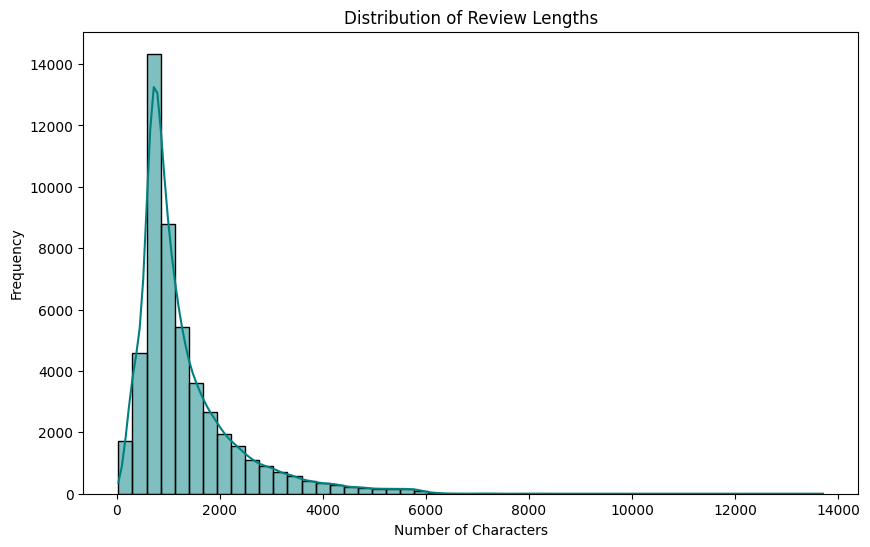

In [3]:
# Review Length Distribution
data['review_length'] = data['review'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

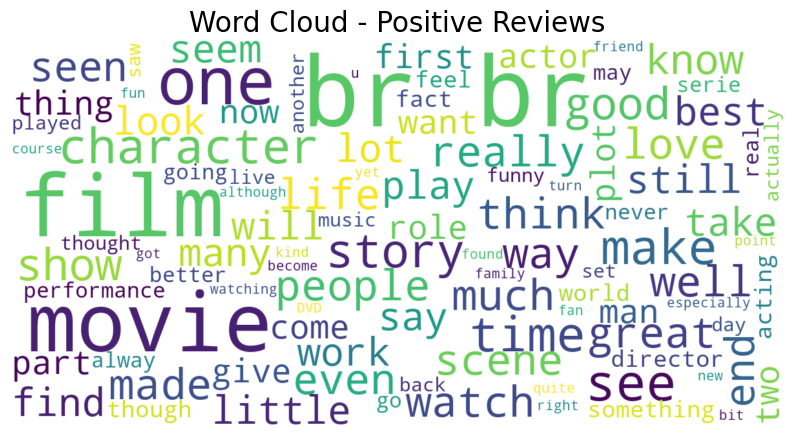

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=100,
        max_font_size=50,
        scale=3,
        random_state=42
    ).generate(' '.join(text))
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Generate word cloud for positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']
generate_wordcloud(positive_reviews, 'Word Cloud - Positive Reviews')

# Generate word cloud for negative reviews
negative_reviews = data[data['sentiment'] == 'negative']['review']
generate_wordcloud(negative_reviews, 'Word Cloud - Negative Reviews')